In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data=iris.iloc[:,1:-1].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=4)

In [ ]:
km.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
pred=km.predict(data)

In [ ]:
print(km.cluster_centers_)


[[3.1        5.87096774 2.12580645]
 [3.428      1.462      0.246     ]
 [2.6        3.94285714 1.20714286]
 [2.88536585 4.83414634 1.65609756]]


Text(0.5, 1.0, 'iris dataset kmeans')

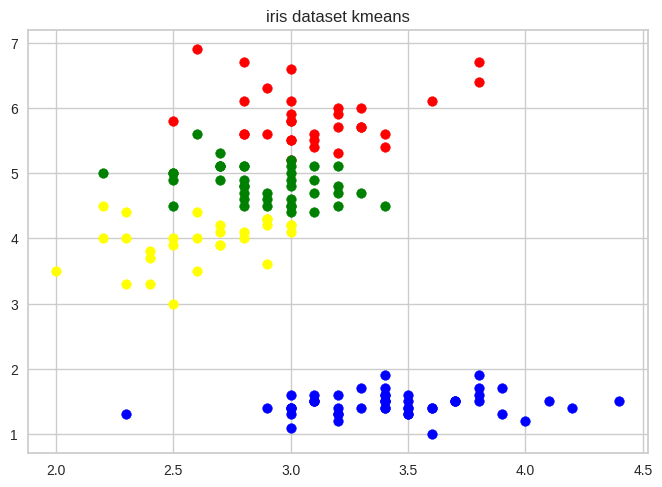

In [ ]:
plt.scatter(data[pred==0,0],data[pred==0,1],color='red')
plt.scatter(data[pred==1,0],data[pred==1,1],color='blue')
plt.scatter(data[pred==2,0],data[pred==2,1],color='yellow')
plt.scatter(data[pred==3,0],data[pred==3,1],color='green')
plt.title('iris dataset kmeans')

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

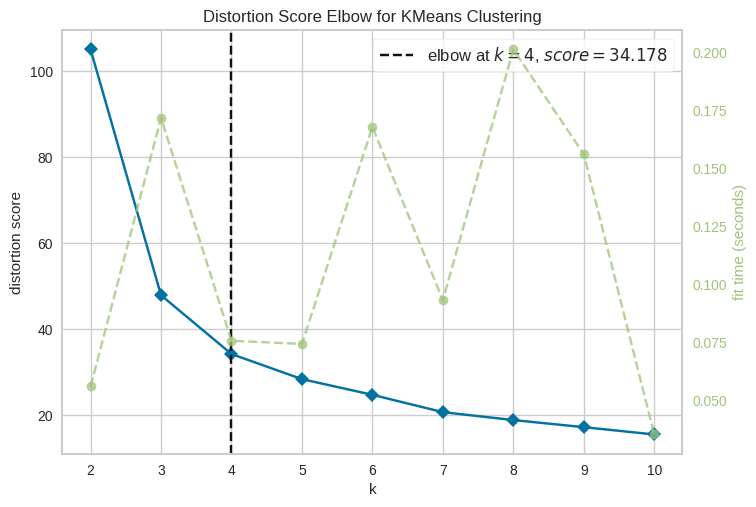

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualr=KElbowVisualizer(km)
visualr.fit(data)
visualr.poof()

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

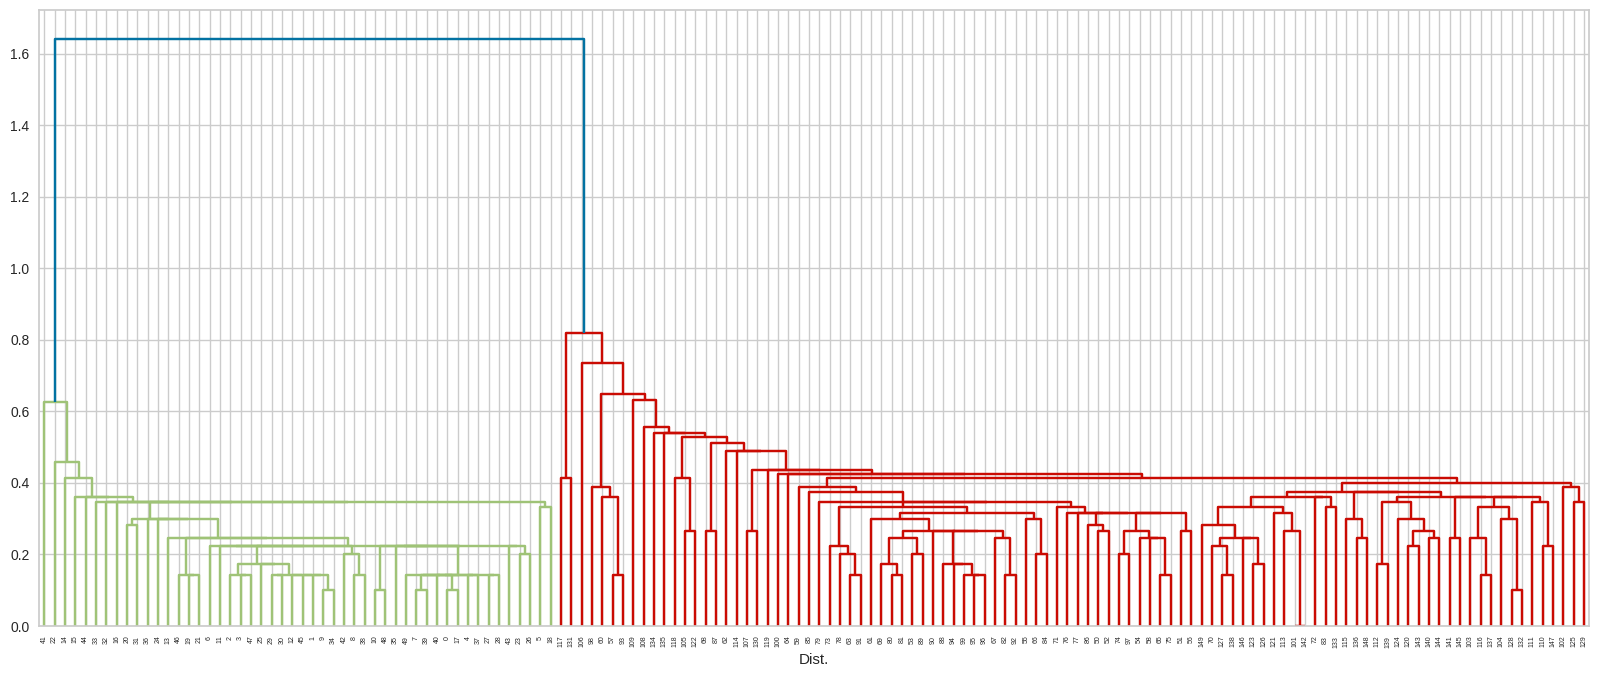

In [ ]:
dist_sin=linkage(iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]])
plt.figure(figsize=(20,8))
dendrogram(dist_sin,leaf_rotation=90)
plt.xlabel('Index')
plt.xlabel('Dist.')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
iris_c=iris.copy()
iris_c['2_clust']=fcluster(dist_sin,2,criterion='maxclust')
iris_c['3_clust']=fcluster(dist_sin,3,criterion='maxclust')
iris_c['4_clust']=fcluster(dist_sin,4,criterion='maxclust')

<Axes: title={'center': 'species'}, xlabel='petal_length', ylabel='petal_width'>

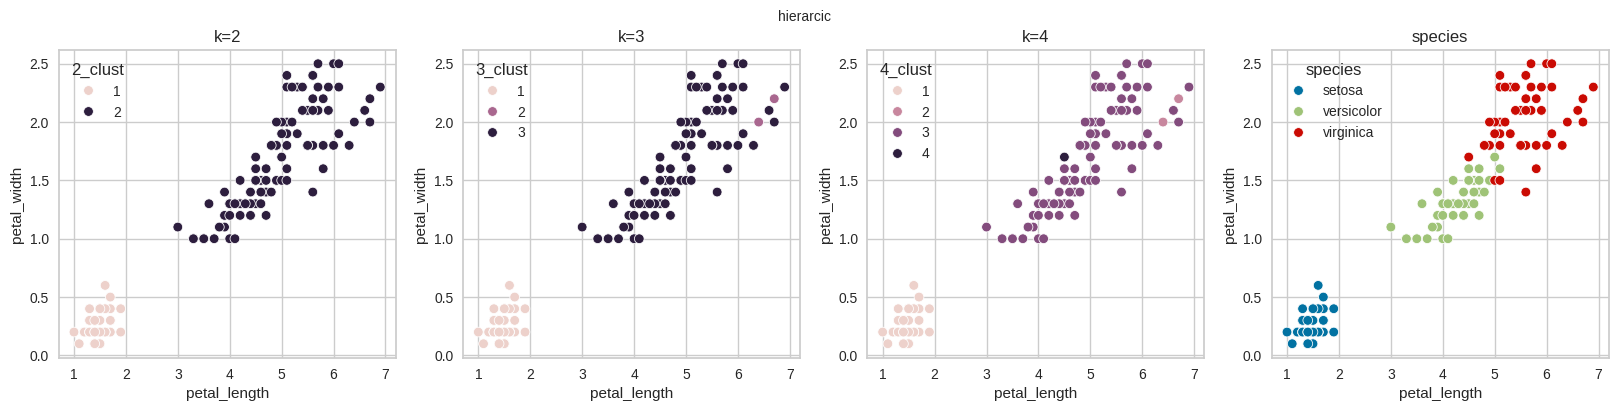

In [ ]:
plt.figure(figsize=(20,4))
plt.suptitle('hierarcic  ',fontsize=10)

plt.subplot(1,4,1)
plt.title('k=2')
sns.scatterplot(x="petal_length",y="petal_width",data=iris_c,hue="2_clust")

plt.subplot(1,4,2)
plt.title('k=3')
sns.scatterplot(x="petal_length",y="petal_width",data=iris_c,hue="3_clust")

plt.subplot(1,4,3)
plt.title('k=4')
sns.scatterplot(x="petal_length",y="petal_width",data=iris_c,hue="4_clust")

plt.subplot(1,4,4)
plt.title('species')
sns.scatterplot(x="petal_length",y="petal_width",data=iris_c,hue="species")